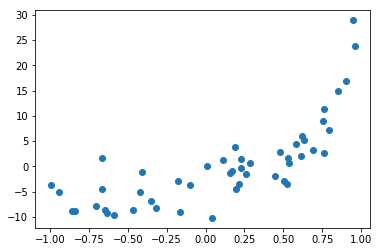

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

########### Question 1 ###########
## 1

# data
df_train = pd.read_csv("hwk1_datasets/Datasets/Dataset_1_train.csv")
df_valid = pd.read_csv("hwk1_datasets/Datasets/Dataset_1_valid.csv")
df_test = pd.read_csv("hwk1_datasets/Datasets/Dataset_1_test.csv")

# training
data_train = df_train.values
x_train = np.array(data_train[:,0])
x_train = np.vstack(x_train)
y_train = np.array(data_train[:,1])
y_train = np.vstack(y_train)

# validation
data_valid = df_valid.values
x_valid = np.array(data_valid[:,0])
x_valid = np.vstack(x_valid)
y_valid = np.array(data_valid[:,1])
y_valid = np.vstack(y_valid)

# testing
data_test = df_test.values
x_test = np.array(data_test[:,0])
x_test = np.vstack(x_test)
y_test = np.array(data_test[:,1])
y_test = np.vstack(y_test)

plt.plot(x_train,y_train,'o')
plt.show()


In [2]:
# manipulate to m+1 columns with m=20
X_train = np.hstack((x_train, np.ones([x_train.size,1])))
X_valid = np.hstack((x_valid, np.ones([x_valid.size,1])))
X_test = np.hstack((x_test, np.ones([x_test.size,1])))


for i in range(19):
    x_tmp = np.multiply(X_train[:,0],X_train[:,i])
    x_tmp = np.vstack(x_tmp)
    X_train = np.hstack((x_tmp,X_train))
    
    x_tmp = np.multiply(X_valid[:,0],X_valid[:,i])
    x_tmp = np.vstack(x_tmp)
    X_valid = np.hstack((x_tmp,X_valid))

    x_tmp = np.multiply(X_test[:,0],X_test[:,i])
    x_tmp = np.vstack(x_tmp)
    X_test = np.hstack((x_tmp,X_test))



In [3]:
# closed-form
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),X_train.T),y_train)
print(w)

[[ -2.02658533e+06]
 [  4.04477323e+05]
 [  9.17456651e+06]
 [ -2.00155813e+06]
 [ -1.75404191e+07]
 [  4.13191599e+06]
 [  1.84140634e+07]
 [ -4.63197869e+06]
 [ -1.15538762e+07]
 [  3.06830200e+06]
 [  4.41874516e+06]
 [ -1.22160132e+06]
 [ -1.00649479e+06]
 [  2.83496759e+05]
 [  1.27407406e+05]
 [ -3.50595526e+04]
 [ -7.73125713e+03]
 [  1.87998225e+03]
 [  1.55101116e+02]
 [ -1.51177127e+01]
 [ -3.90390121e+00]]


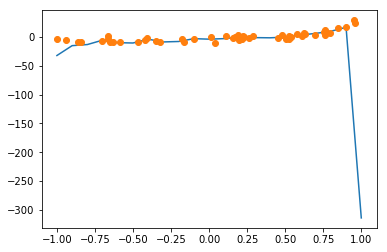

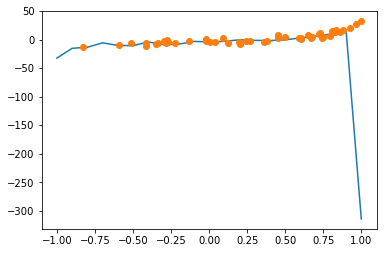

In [4]:
# visualize
def graph(formula, x_range, x, y):
    xs = np.array(x_range)
    ys = formula(xs)
    
    plt.plot(xs,ys)
    plt.plot(x,y,'o')
    plt.show()

# training data
graph(lambda xs: xs**20*w[0] + xs**19*w[1] + xs**18*w[2] + xs**17*w[3] + xs**16*w[4] + xs**15*w[5] + xs**14*w[6] + xs**13*w[7] + xs**12*w[8] + xs**11*w[9] + xs**10*w[10] + xs**9*w[11] + xs**8*w[12] + xs**7*w[13] + xs**6*w[14] + xs**5*w[15] + xs**4*w[16] + xs**3*w[17] + xs**2*w[18] + xs*w[19] + w[20], np.arange(-1,1.1,0.1), x_train, y_train)

# validation data
graph(lambda xs: xs**20*w[0] + xs**19*w[1] + xs**18*w[2] + xs**17*w[3] + xs**16*w[4] + xs**15*w[5] + xs**14*w[6] + xs**13*w[7] + xs**12*w[8] + xs**11*w[9] + xs**10*w[10] + xs**9*w[11] + xs**8*w[12] + xs**7*w[13] + xs**6*w[14] + xs**5*w[15] + xs**4*w[16] + xs**3*w[17] + xs**2*w[18] + xs*w[19] + w[20], np.arange(-1,1.1,0.1), x_valid, y_valid)


In [5]:
# MSE function
def MSE(w,x,y):
    return np.matmul(np.transpose(np.subtract(y,np.matmul(x,w))),np.subtract(y,np.matmul(x,w)))

# training data
print("Training: ", MSE(w,X_train,y_train))

# validation data
print("Validation: ", MSE(w,X_valid,y_valid))

Training:  [[ 321.25716717]]
Validation:  [[ 73284.80917279]]


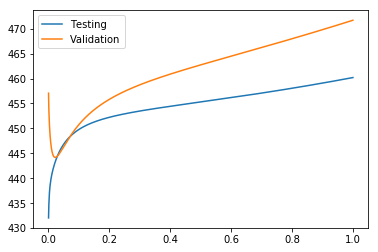

In [6]:
## 2
# L2 regularization function
def L2(x,y,L):
    I = np.identity(np.matmul(x.T,x).shape[0])
    return np.matmul(np.matmul(np.linalg.inv(np.add(np.matmul(x.T,x),I*L)),x.T),y)


# training data
L = np.arange(0,1.001,0.001) # lambda from 0 to 1 

# initialize training and validation error arrays for storage
MSE_train = np.empty(shape=(0))
MSE_valid = np.empty(shape=(0))

for i in range(L.size):
    w_L2 = L2(X_train,y_train,L[i])
    
    MSE_train = np.append(MSE_train, MSE(w_L2,X_train,y_train))
    # print("Training: ", MSE_train)
    # graph(lambda xs: xs**20*w_L2[0] + xs**19*w_L2[1] + xs**18*w_L2[2] + xs**17*w_L2[3] + xs**16*w_L2[4] + xs**15*w_L2[5] + xs**14*w_L2[6] + xs**13*w_L2[7] + xs**12*w_L2[8] + xs**11*w_L2[9] + xs**10*w_L2[10] + xs**9*w_L2[11] + xs**8*w_L2[12] + xs**7*w_L2[13] + xs**6*w_L2[14] + xs**5*w_L2[15] + xs**4*w_L2[16] + xs**3*w_L2[17] + xs**2*w_L2[18] + xs*w_L2[19] + w_L2[20], np.arange(-1,1,0.1), x_train, y_train)

    MSE_valid = np.append(MSE_valid, MSE(w_L2,X_valid,y_valid))
    # print("Validation: ", MSE_valid)
    # graph(lambda xs: xs**20*w_L2[0] + xs**19*w_L2[1] + xs**18*w_L2[2] + xs**17*w_L2[3] + xs**16*w_L2[4] + xs**15*w_L2[5] + xs**14*w_L2[6] + xs**13*w_L2[7] + xs**12*w_L2[8] + xs**11*w_L2[9] + xs**10*w_L2[10] + xs**9*w_L2[11] + xs**8*w_L2[12] + xs**7*w_L2[13] + xs**6*w_L2[14] + xs**5*w_L2[15] + xs**4*w_L2[16] + xs**3*w_L2[17] + xs**2*w_L2[18] + xs*w_L2[19] + w_L2[20], np.arange(-1,1,0.1), x_valid, y_valid)



MSE_train = np.vstack(MSE_train)
MSE_valid = np.vstack(MSE_valid)
MSE_total = np.hstack((MSE_train,MSE_valid))
L = np.vstack(L)
MSE_total = np.hstack((L,MSE_total))
#print(MSE_total)
#print(np.amin(MSE_valid))

# plot testing and validation MSEs
plt.plot(L[1:,],MSE_train[1:,],label="Testing")
plt.plot(L[1:,],MSE_valid[1:,],label="Validation")
plt.legend()
plt.show()

[ 0.023]


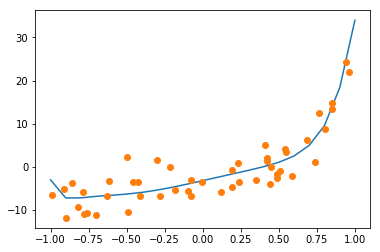

Testing:  [[ 528.00604664]]


In [7]:
for i in range(L.size):
    if np.equal(np.around(np.amin(MSE_valid),decimals=5),np.around(MSE_valid[i],decimals=5)):
        L_opt = L[i]

        
print(L_opt)
w_opt = L2(X_train,y_train,L_opt)

# testing data
graph(lambda xs: xs**20*w_opt[0] + xs**19*w_opt[1] + xs**18*w_opt[2] + xs**17*w_opt[3] + xs**16*w_opt[4] + xs**15*w_opt[5] + xs**14*w_opt[6] + xs**13*w_opt[7] + xs**12*w_opt[8] + xs**11*w_opt[9] + xs**10*w_opt[10] + xs**9*w_opt[11] + xs**8*w_opt[12] + xs**7*w_opt[13] + xs**6*w_opt[14] + xs**5*w_opt[15] + xs**4*w_opt[16] + xs**3*w_opt[17] + xs**2*w_opt[18] + xs*w_opt[19] + w_opt[20], np.arange(-1,1.1,0.1), x_test, y_test)
print("Testing: ", MSE(w_opt,X_test,y_test))


In [ ]:
## 3

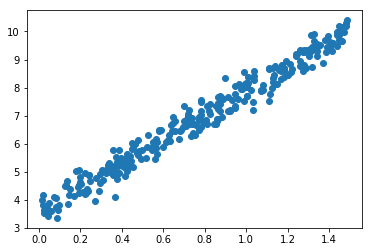

In [8]:
########### Question 2 ###########
df_train = pd.read_csv("hwk1_datasets/Datasets/Dataset_2_train.csv")
df_valid = pd.read_csv("hwk1_datasets/Datasets/Dataset_2_valid.csv")
df_test = pd.read_csv("hwk1_datasets/Datasets/Dataset_2_test.csv")

# training
data_train = df_train.values
x_train = np.array(data_train[:,0])
x_train = np.vstack(x_train)
y_train = np.array(data_train[:,1])
y_train = np.vstack(y_train)

# validation
data_valid = df_valid.values
x_valid = np.array(data_valid[:,0])
x_valid = np.vstack(x_valid)
y_valid = np.array(data_valid[:,1])
y_valid = np.vstack(y_valid)

# testing
data_test = df_test.values
x_test = np.array(data_test[:,0])
x_test = np.vstack(x_test)
y_test = np.array(data_test[:,1])
y_test = np.vstack(y_test)

plt.plot(x_train,y_train,'o')
plt.show()

In [9]:
## 1

# manipulate to m+1 columns with m=20
X_train = np.hstack((x_train, np.ones([x_train.size,1])))
X_valid = np.hstack((x_valid, np.ones([x_valid.size,1])))
X_test = np.hstack((x_test, np.ones([x_test.size,1])))

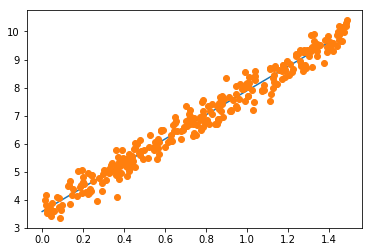

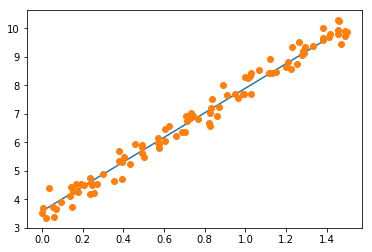

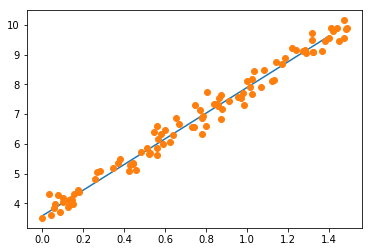

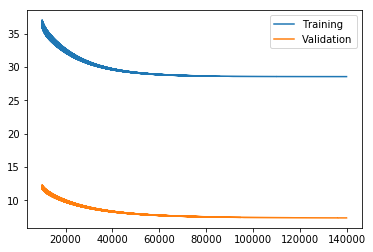

In [50]:
# initialize 2 random weights
w1 = np.random.random((2,1))
w2 = np.random.random((2,1))

train = []
valid = []
train.append(MSE(w2,X_train,y_train))
valid.append(MSE(w2,X_valid,y_valid))

epoch = 1

# gradient descent
alpha = 0.000001    # step size 1e-6
e = 0.0005

while(True):
    epoch += 1
    w1t = w1
    w1 = w2
    w2 = w1t - alpha*2*(np.subtract(np.matmul(np.matmul(X_train.T,X_train),w1t),np.matmul(X_train.T,y_train)))
    
    # find MSE on training and validation set
    train.append(MSE(w2,X_train,y_train))
    valid.append(MSE(w2,X_valid,y_valid))

    if(abs(np.subtract(w2[0],w1[0]))<e and abs(np.subtract(w2[1],w1[1]))<e):
        break
    
graph(lambda xs: xs*w2[0] + w2[1], np.arange(0,1.5,0.1), x_train, y_train)
graph(lambda xs: xs*w2[0] + w2[1], np.arange(0,1.5,0.1), x_valid, y_valid)
graph(lambda xs: xs*w2[0] + w2[1], np.arange(0,1.5,0.1), x_test, y_test)

MSE_train = np.asarray(train, dtype=np.float32)
MSE_train = np.squeeze(MSE_train)
MSE_valid = np.asarray(valid, dtype=np.float32)
MSE_valid = np.squeeze(MSE_valid)

plt.plot(np.arange(10000,epoch,1),MSE_train[10000:],label="Training")
plt.plot(np.arange(10000,epoch,1),MSE_valid[10000:],label="Validation")
plt.legend()
plt.show()

In [57]:
## 2
# initialize 2 random weights
w1 = np.random.random((2,1))
w2 = np.random.random((2,1))

alpha_list = np.arange(0.0000001,0.00001,0.000001)    # alpha range 
e = 0.0005

min_MSE = {}


for i in range(alpha_list.size):
    valid = []
    valid.append(MSE(w2,X_valid,y_valid))
    epoch = 1

    while(True):
        epoch += 1
        alpha = alpha_list[i]
        w1t = w1
        w1 = w2
        w2 = w1t - alpha*2*(np.subtract(np.matmul(np.matmul(X_train.T,X_train),w1t),np.matmul(X_train.T,y_train)))

        # find MSE on training and validation set
        valid.append(MSE(w2,X_valid,y_valid))

        if(abs(np.subtract(w2[0],w1[0]))<e and abs(np.subtract(w2[1],w1[1]))<e):
            break
    
    # find minimum MSE of validation set 
    MSE_valid = np.asarray(valid, dtype=np.float32)
    MSE_valid = np.squeeze(MSE_valid)
    min_MSE[w2] = np.amin(MSE_valid)
    
graph(lambda xs: xs*w2[0] + w2[1], np.arange(0,1.5,0.1), x_train, y_train)

print(min_MSE)


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
########### Question 3 ###########
## 1

f = open("hwk1_datasets/Datasets/communities.data","r")
data = f.read()
f.close()
